In [42]:
import numpy as np
import matplotlib.pyplot as plt

LTSPICE_SIM_OUTPUT_PATH = 'data/sim-output.txt' 
MEASUREMENT_DATA_PATH = 'data/measurement-data.csv'


In [43]:
def load_ltspice_output(path: str) -> dict[str, np.ndarray]:
    with open(path, 'r', encoding='latin1') as f:
        lines = f.readlines()
    frequency = []
    magnitude = []
    phase = []
    for line in lines[1:]:  # Skip the header
        parts = line.split()
        frequency.append(float(parts[0]))
        mag_phase_str = parts[1].split(',')
        magnitude.append(float(mag_phase_str[0][1:-2]))
        phase.append(float(mag_phase_str[1][:-2]))

    return {
        'frequency': np.array(frequency),
        'magnitude': np.array(magnitude),
        'phase': np.array(phase)
    }

def load_measurement_data(path: str) -> dict[str, np.ndarray]:
    data = np.genfromtxt(path, delimiter=',', skip_header=1, dtype=float)
    frequency_provided = data[:, 1]
    magnitude_provided = data[:, 5]
    phase_provided = data[:, 4]

    return {
        'frequency': frequency_provided,
        'magnitude': magnitude_provided,
        'phase': phase_provided
    }


In [44]:
LTSIPCE_DATA = load_ltspice_output(LTSPICE_SIM_OUTPUT_PATH)
MEASUREMENT_DATA = load_measurement_data(MEASUREMENT_DATA_PATH)

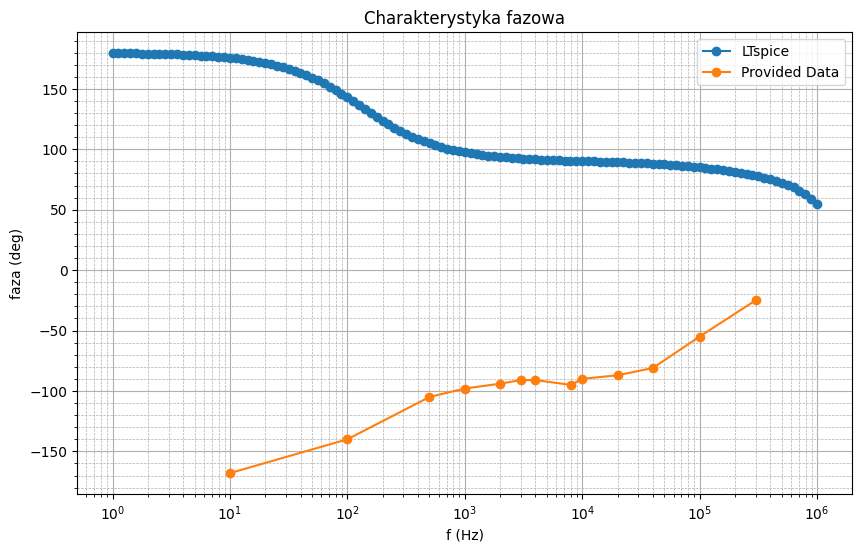

In [45]:

plt.figure(figsize=(10, 6))
plt.semilogx(LTSIPCE_DATA['frequency'], LTSIPCE_DATA['phase'], marker='o', linestyle='-', label='LTspice')
plt.semilogx(MEASUREMENT_DATA['frequency'], MEASUREMENT_DATA['phase'], marker='o', linestyle='-', label='Dane pomiarowe')
plt.title('Charakterystyka fazowa')
plt.xlabel('f (Hz)')
plt.ylabel('faza (deg)')
plt.legend()
plt.gca().xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Add horizontal gridlines
plt.grid(which='minor', linestyle='--', linewidth=0.5)  # Add minor gridlines
plt.minorticks_on()  # Turn on minor ticks
plt.grid(True)
plt.show()

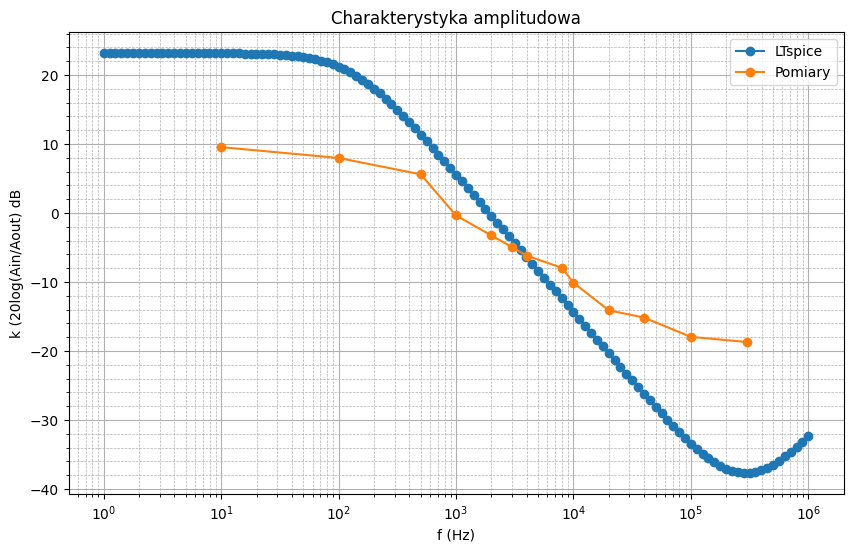

In [47]:
plt.figure(figsize=(10, 6))
plt.semilogx(LTSIPCE_DATA['frequency'], LTSIPCE_DATA['magnitude'], marker='o', linestyle='-', label='LTspice')
plt.semilogx(MEASUREMENT_DATA['frequency'], MEASUREMENT_DATA['magnitude'], marker='o', linestyle='-', label='Pomiary')
plt.title('Charakterystyka amplitudowa')
plt.xlabel('f (Hz)')
plt.ylabel('k (20log(Ain/Aout) dB')
plt.legend()
plt.gca().xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Add horizontal gridlines
plt.grid(which='minor', linestyle='--', linewidth=0.5)  # Add minor gridlines
plt.minorticks_on()  # Turn on minor ticks
plt.grid(True)
plt.show()